In this notebook we will evaluate different combinations of features.

- Dataset = GTZAN
- Model = SVM


In [2]:
import numpy as np
# import matplotlib.pyplot as plt
# import IPython
# from scipy import signal
# import librosa.display
# import librosa
# import sklearn
from sklearn import ensemble, model_selection, svm, pipeline, preprocessing, metrics
from pathlib import Path
from sklearn.decomposition import PCA


In [3]:
def report(y_true, y_pred):
    r = metrics.classification_report(y_true=y_true, y_pred=y_pred)
    print(r)

    metrics.ConfusionMatrixDisplay.from_predictions(y_true=y_true, y_pred=y_pred)

    f1 = metrics.f1_score(y_true=labels, y_pred=y_pred, average='weighted')
    print(f'F1: {f1}')

    

## Load labels

In [4]:
datapath = Path('data_npy/gtzan')

labels = np.load(datapath / 'labels_train.npy')
np.unique(labels)

array(['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz',
       'metal', 'pop', 'reggae', 'rock'], dtype='<U9')

## Model

In [7]:
clf = svm.SVC()

pipe = pipeline.Pipeline(
    [
        ('scaler', preprocessing.StandardScaler()),
        ('dim_reduction', PCA(n_components=100)),
        ('clf', clf),
    ]
)

pipe_nopca = pipeline.Pipeline(
    [
        ('scaler', preprocessing.StandardScaler()),
        ('clf', clf),
    ]
)

cv = model_selection.StratifiedKFold(n_splits=10)

## Feature: Tempo

Features: (799, 1)


/Users/sean.fitzgibbon/dev/RP/.venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sean.fitzgibbon/dev/RP/.venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sean.fitzgibbon/dev/RP/.venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

              precision    recall  f1-score   support

       blues       0.00      0.00      0.00        80
   classical       0.15      0.11      0.13        80
     country       0.21      0.04      0.06        80
       disco       0.17      0.57      0.26        80
      hiphop       0.20      0.61      0.30        80
        jazz       0.00      0.00      0.00        79
       metal       0.00      0.00      0.00        80
         pop       0.12      0.07      0.09        80
      reggae       0.24      0.41      0.30        80
        rock       0.00      0.00      0.00        80

    accuracy                           0.18       799
   macro avg       0.11      0.18      0.12       799
weighted avg       0.11      0.18      0.12       799

F1: 0.11527863277797501


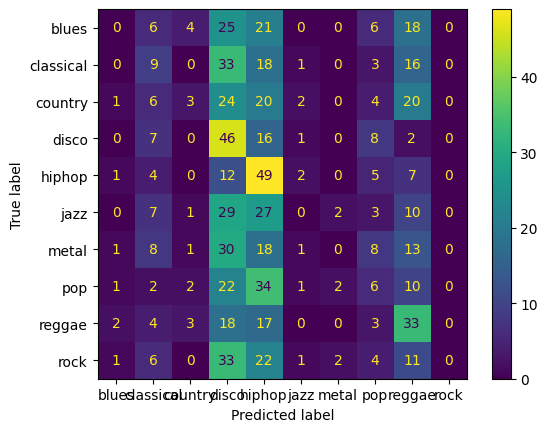

In [11]:
features = np.load(datapath / 'tempo.npy')
print(f'Features: {features.shape}')

y_pred = model_selection.cross_val_predict(
    estimator=pipe_nopca, 
    X=features, 
    y=labels, 
    cv=cv, 
    n_jobs=-1
)

report(labels, y_pred)

## Feature: SC

Spectral Contrast

Features: (799, 9030)
              precision    recall  f1-score   support

       blues       0.49      0.68      0.57        80
   classical       0.73      0.84      0.78        80
     country       0.43      0.60      0.50        80
       disco       0.31      0.29      0.30        80
      hiphop       0.47      0.35      0.40        80
        jazz       0.90      0.34      0.50        79
       metal       0.61      0.89      0.72        80
         pop       0.42      0.68      0.51        80
      reggae       0.59      0.16      0.25        80
        rock       0.39      0.26      0.31        80

    accuracy                           0.51       799
   macro avg       0.53      0.51      0.49       799
weighted avg       0.53      0.51      0.49       799

F1: 0.48511059639604964


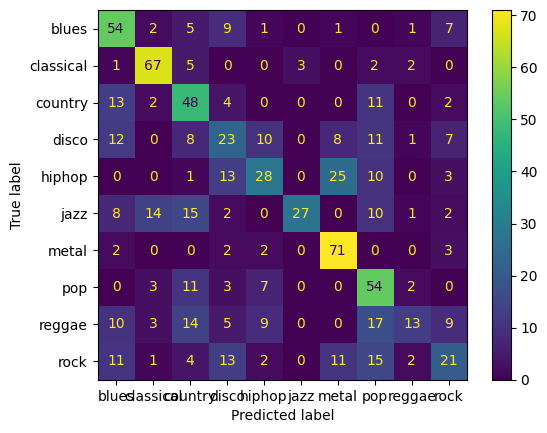

In [27]:
features = np.load(datapath / 'sc.npy')
print(f'Features: {features.shape}')

y_pred = model_selection.cross_val_predict(
    estimator=pipe, 
    X=features, 
    y=labels, 
    cv=cv, 
    n_jobs=-1
)

report(labels, y_pred)

## Feature: MFCC

In [12]:
features = np.load(datapath / 'mfcc.npy')
print(f'Features: {features.shape}')

y_pred = model_selection.cross_val_predict(
    estimator=pipe, 
    X=features, 
    y=labels, 
    cv=cv, 
    n_jobs=-1
)

Features: (799, 25800)


              precision    recall  f1-score   support

       blues       0.75      0.34      0.47        80
   classical       0.84      0.89      0.86        80
     country       0.46      0.54      0.49        80
       disco       0.37      0.50      0.43        80
      hiphop       0.52      0.55      0.54        80
        jazz       0.61      0.48      0.54        79
       metal       0.71      0.81      0.76        80
         pop       0.72      0.72      0.72        80
      reggae       0.54      0.38      0.44        80
        rock       0.36      0.46      0.40        80

    accuracy                           0.57       799
   macro avg       0.59      0.57      0.57       799
weighted avg       0.59      0.57      0.57       799

F1: 0.5650380374874238


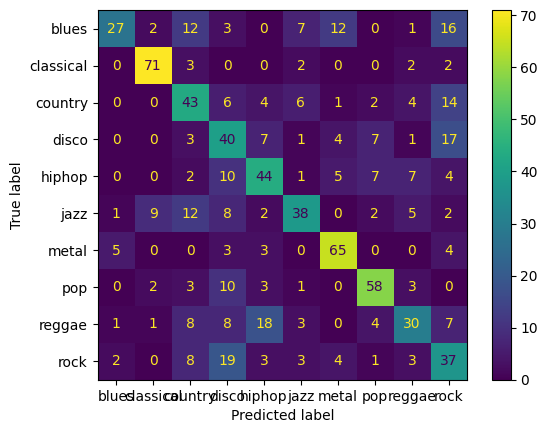

In [22]:
report(labels, y_pred)

## Feature: STFT

In [24]:
features = np.load(datapath / 'stft.npy')
print(f'Features: {features.shape}')

y_pred = model_selection.cross_val_predict(
    estimator=pipe, 
    X=features, 
    y=labels, 
    cv=cv, 
    n_jobs=-1
)

Features: (799, 661125)


              precision    recall  f1-score   support

       blues       0.37      0.21      0.27        80
   classical       0.88      0.81      0.84        80
     country       0.40      0.31      0.35        80
       disco       0.40      0.31      0.35        80
      hiphop       0.44      0.42      0.43        80
        jazz       0.43      0.59      0.50        79
       metal       0.61      0.88      0.72        80
         pop       0.61      0.72      0.66        80
      reggae       0.36      0.31      0.33        80
        rock       0.25      0.28      0.26        80

    accuracy                           0.49       799
   macro avg       0.47      0.49      0.47       799
weighted avg       0.47      0.49      0.47       799

F1: 0.4724496087404841


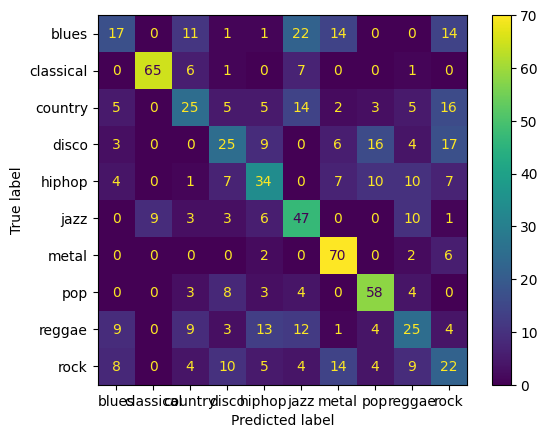

In [25]:
report(labels, y_pred)

## Feature: MFCC + STFT

Features: (799, 686925)
              precision    recall  f1-score   support

       blues       0.45      0.24      0.31        80
   classical       0.88      0.81      0.84        80
     country       0.42      0.31      0.36        80
       disco       0.34      0.28      0.31        80
      hiphop       0.44      0.45      0.45        80
        jazz       0.43      0.59      0.50        79
       metal       0.63      0.88      0.73        80
         pop       0.60      0.72      0.66        80
      reggae       0.39      0.36      0.38        80
        rock       0.28      0.31      0.30        80

    accuracy                           0.50       799
   macro avg       0.49      0.50      0.48       799
weighted avg       0.49      0.50      0.48       799

F1: 0.4831641814429509


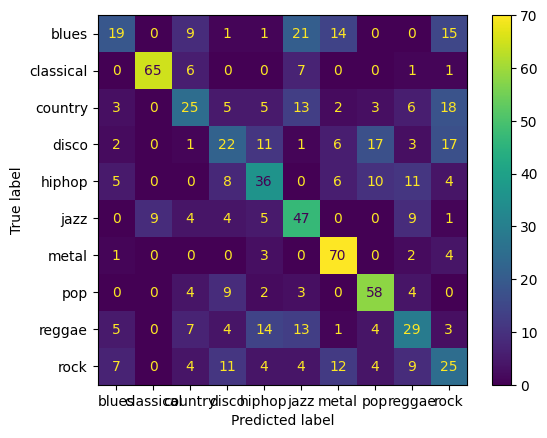

In [26]:
features = [
    np.load(datapath / 'mfcc.npy'),
    np.load(datapath / 'stft.npy'),
]
features = np.concatenate(features, axis=1)
print(f'Features: {features.shape}')

y_pred = model_selection.cross_val_predict(
    estimator=pipe, 
    X=features, 
    y=labels, 
    cv=cv, 
    n_jobs=-1
)

report(labels, y_pred)

## Feature: MFCC + SC

Features: (799, 34830)
              precision    recall  f1-score   support

       blues       0.82      0.59      0.69        80
   classical       0.84      0.91      0.87        80
     country       0.56      0.72      0.63        80
       disco       0.49      0.70      0.57        80
      hiphop       0.68      0.65      0.67        80
        jazz       0.66      0.54      0.60        79
       metal       0.79      0.86      0.83        80
         pop       0.81      0.74      0.77        80
      reggae       0.64      0.47      0.55        80
        rock       0.40      0.39      0.39        80

    accuracy                           0.66       799
   macro avg       0.67      0.66      0.66       799
weighted avg       0.67      0.66      0.66       799

F1: 0.6572517081090882


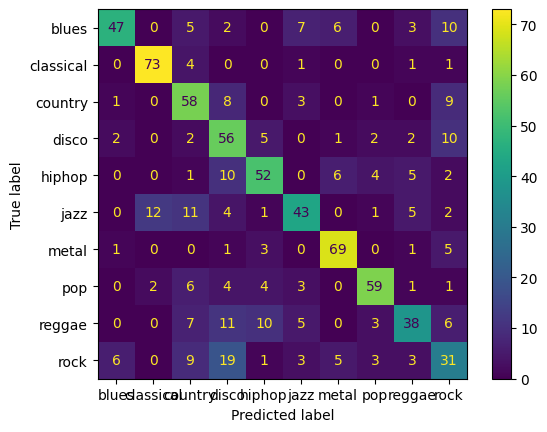

In [28]:
features = [
    np.load(datapath / 'mfcc.npy'),
    np.load(datapath / 'sc.npy'),
]
features = np.concatenate(features, axis=1)
print(f'Features: {features.shape}')

y_pred = model_selection.cross_val_predict(
    estimator=pipe, 
    X=features, 
    y=labels, 
    cv=cv, 
    n_jobs=-1
)

report(labels, y_pred)

## Feature: MFCC + SC + Tempo

Features: (799, 34831)
              precision    recall  f1-score   support

       blues       0.82      0.57      0.68        80
   classical       0.85      0.90      0.87        80
     country       0.54      0.70      0.61        80
       disco       0.45      0.66      0.54        80
      hiphop       0.67      0.64      0.65        80
        jazz       0.67      0.54      0.60        79
       metal       0.80      0.86      0.83        80
         pop       0.82      0.75      0.78        80
      reggae       0.64      0.47      0.55        80
        rock       0.40      0.40      0.40        80

    accuracy                           0.65       799
   macro avg       0.67      0.65      0.65       799
weighted avg       0.67      0.65      0.65       799

F1: 0.6517566632516905


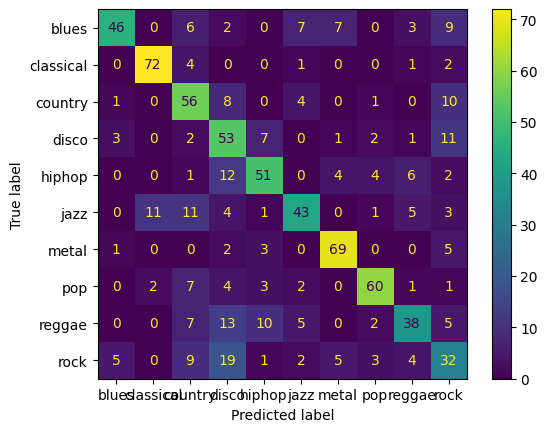

In [10]:
features = [
    np.load(datapath / 'mfcc.npy'),
    np.load(datapath / 'sc.npy'),
    np.load(datapath / 'tempo.npy'),
]
features = np.concatenate(features, axis=1)
print(f'Features: {features.shape}')

y_pred = model_selection.cross_val_predict(
    estimator=pipe, 
    X=features, 
    y=labels, 
    cv=cv, 
    n_jobs=-1
)

report(labels, y_pred)